In [1]:
import pandas as pd
birds_data = pd.read_csv("bird_tracking.csv")

In [2]:
birds_data

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric
...,...,...,...,...,...,...,...,...,...
61915,61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne
61916,61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne
61917,61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne
61918,61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne


In [3]:
birds_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 9 columns):
Unnamed: 0            61920 non-null int64
altitude              61920 non-null int64
date_time             61920 non-null object
device_info_serial    61920 non-null int64
direction             61477 non-null float64
latitude              61920 non-null float64
longitude             61920 non-null float64
speed_2d              61477 non-null float64
bird_name             61920 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 4.3+ MB


In [4]:
import matplotlib.pyplot as plt
import numpy as np
ix = birds_data.bird_name == "Eric"

In [5]:
x,y = birds_data.longitude[ix], birds_data.latitude[ix]

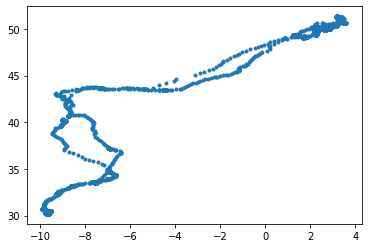

In [6]:
plt.plot(x,y,".")

In [7]:
bird_names = pd.unique(birds_data.bird_name)

In [8]:
bird_names

array(['Eric', 'Nico', 'Sanne'], dtype=object)

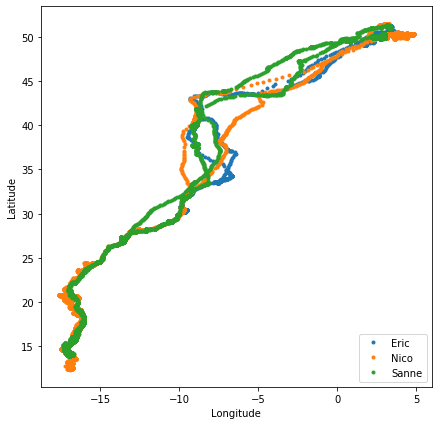

In [9]:
bird_names = pd.unique(birds_data.bird_name)
plt.figure(figsize = (7,7))
for bird_name in bird_names:
    ix = birds_data.bird_name == bird_name
    x,y = birds_data.longitude[ix], birds_data.latitude[ix]
    plt.plot(x,y, ".", label = bird_name)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc = "lower right")
plt.savefig("3birds_traj.pdf")

C:\Users\Noman Aijaz\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Noman Aijaz\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.7732e+04, 1.5020e+03, 3.6900e+02, 7.8000e+01, 1.2000e+01,
        7.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 0.        ,  6.34880658, 12.69761316, 19.04641974, 25.39522632,
        31.7440329 , 38.09283948, 44.44164607, 50.79045265, 57.13925923,
        63.48806581]),
 <a list of 10 Patch objects>)

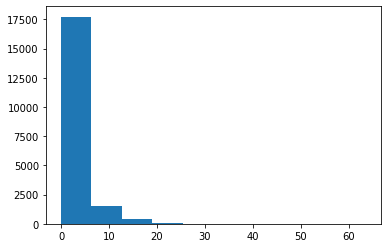

In [10]:
ix = birds_data.bird_name == "Eric"
speed = birds_data.speed_2d[ix]
plt.hist(speed)

In [11]:
n = speed[:10]
n

0    0.150000
1    2.438360
2    0.596657
3    0.310161
4    0.193132
5    2.904772
6    3.080584
7    2.199659
8    2.640076
9    4.592211
Name: speed_2d, dtype: float64

(array([3., 1., 0., 0., 1., 2., 2., 0., 0., 1.]),
 array([0.15      , 0.59422108, 1.03844216, 1.48266324, 1.92688432,
        2.3711054 , 2.81532648, 3.25954756, 3.70376864, 4.14798972,
        4.5922108 ]),
 <a list of 10 Patch objects>)

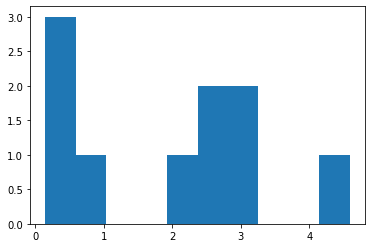

In [12]:
plt.hist(n)

In [13]:
#nan stands for not a number 
#np.isnan() checks wheather is there any data which is not a number
ind = np.isnan(speed)
ind

0        False
1        False
2        False
3        False
4        False
         ...  
19790    False
19791    False
19792    False
19793    False
19794    False
Name: speed_2d, Length: 19795, dtype: bool

In [14]:
#this function tells if there is any data which is not a number
np.isnan(speed).any()

True

In [15]:
#there are 443 values which are not number
np.sum(np.isnan(speed))

85

In [16]:
#~ changes each occurance true to false and vice versa
~ind

0        True
1        True
2        True
3        True
4        True
         ... 
19790    True
19791    True
19792    True
19793    True
19794    True
Name: speed_2d, Length: 19795, dtype: bool

In [17]:
np.sum(~ind)

19710

(array([1.7732e+04, 1.5020e+03, 3.6900e+02, 7.8000e+01, 1.2000e+01,
        7.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 0.        ,  6.34880658, 12.69761316, 19.04641974, 25.39522632,
        31.7440329 , 38.09283948, 44.44164607, 50.79045265, 57.13925923,
        63.48806581]),
 <a list of 10 Patch objects>)

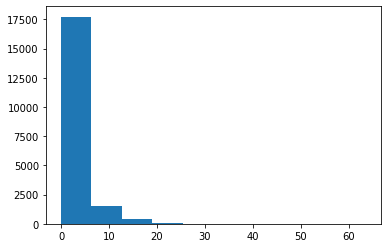

In [18]:
ix = birds_data.bird_name == "Eric"
speed = birds_data.speed_2d[ix]
ind = np.isnan(speed)
plt.hist(speed[~ind])

C:\Users\Noman Aijaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


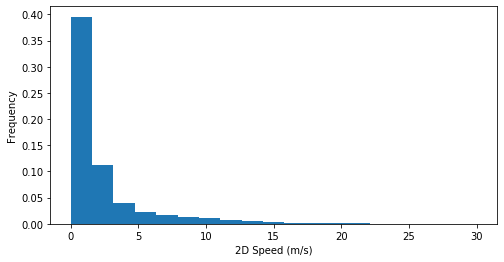

In [19]:
plt.figure(figsize =(8,4))
ix = birds_data.bird_name == "Eric"
speed = birds_data.speed_2d[ix]
ind = np.isnan(speed)
plt.hist(speed[~ind], bins = np.linspace(0,30,20), normed = True)
plt.xlabel("2D Speed (m/s)")
plt.ylabel("Frequency")
plt.savefig("speed_hist.pdf")

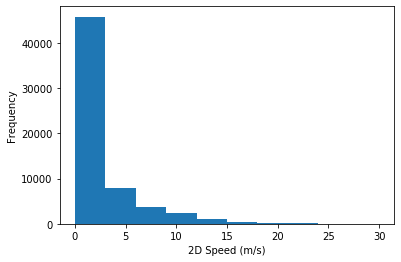

In [20]:
#plotting using pandas, pandas deals automatically with the NaNs
birds_data.speed_2d.plot(kind="hist", range=[0,30])
plt.xlabel("2D Speed (m/s)")
plt.ylabel("Frequency")
plt.savefig("pd_speed_hist.pdf")

In [21]:
import datetime
datetime.datetime.today()

datetime.datetime(2020, 11, 30, 13, 57, 45, 532769)

In [22]:
time_1 = datetime.datetime.today()
time_1

datetime.datetime(2020, 11, 30, 13, 57, 45, 948929)

In [23]:
time_2 = datetime.datetime.today()
time_2

datetime.datetime(2020, 11, 30, 13, 57, 46, 499877)

In [24]:
time_2 - time_1

datetime.timedelta(microseconds=550948)

In [25]:
m = birds_data.date_time[0]
m

'2013-08-15 00:18:08+00'

In [26]:
#the data type of the date_time in birds_data is string 
#we first convert them into time stamp so we can perform the operations
type(m)

str

In [27]:
#we are not interested in UTC(cordinated universal time, an offset express in hours) so we remove them as they are +00
m[:-3]

'2013-08-15 00:18:08'

In [28]:
#strptime() changes the datetime string into time stamp in the format(year, month, day, hours, minutes, seconds)
datetime.datetime.strptime(m[:-3], "%Y-%m-%d %H:%M:%S")

datetime.datetime(2013, 8, 15, 0, 18, 8)

In [29]:
# creates a list which converts all the datetime string into timestamps and removes the UTC
timestamps = []
for k in range(len(birds_data)):
    timestamps.append(datetime.datetime.strptime
    (birds_data.date_time.iloc[k][:-3], "%Y-%m-%d %H:%M:%S"))

In [30]:
timestamps[:4]

[datetime.datetime(2013, 8, 15, 0, 18, 8),
 datetime.datetime(2013, 8, 15, 0, 48, 7),
 datetime.datetime(2013, 8, 15, 1, 17, 58),
 datetime.datetime(2013, 8, 15, 1, 47, 51)]

In [31]:
# adds a new column timestamp in the birds data
birds_data["timestamp"] = pd.Series(timestamps, index = birds_data.index)

In [32]:
birds_data.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42


In [33]:
birds_data.timestamp[4] - birds_data.timestamp[3]

Timedelta('0 days 00:29:51')

In [34]:
#defines how many time pass between observation 0 and given index
times = birds_data.timestamp[birds_data.bird_name=="Eric"]
elapsed_time = [time - times[0] for time in times]

In [35]:
len(times)

19795

In [36]:
elapsed_time[0]

Timedelta('0 days 00:00:00')

In [37]:
elapsed_time[1]

Timedelta('0 days 00:29:59')

In [38]:
#converts the whole elapsed time into days
elapsed_time[4]/datetime.timedelta(days=1)

0.0830324074074074

In [39]:
elapsed_time[4]/datetime.timedelta(days=1)

0.0830324074074074

In [40]:
elapsed_time[4]/datetime.timedelta(hours=1)

1.9927777777777778

In [41]:
np.array(elapsed_time)/datetime.timedelta(days=1)

array([0.0, 0.02082175925925926, 0.04155092592592593, ...,
       258.9399652777778, 258.9607175925926, 258.9814930555556],
      dtype=object)

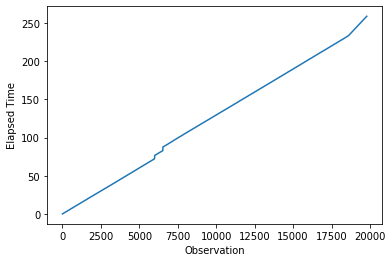

In [42]:
plt.plot(np.array(elapsed_time)/datetime.timedelta(days=1))
plt.xlabel("Observation")
plt.ylabel("Elapsed Time")
plt.savefig("Elapsed_time.pdf")

In [53]:
# calculating daily mean speed of Eric

data = birds_data[birds_data.bird_name=="Eric"]
times = data.timestamp

elapsed_time = [time - times[0] for time in times]
elapsed_days = np.array(elapsed_time)/datetime.timedelta(days=1)

next_day = 1
inds = []
daily_mean_speed = []
#enumerate() returns a tuple which has value and index
for (i,t) in enumerate(elapsed_days):
    print(i,t)
    if t < next_day:
        inds.append(i)
    else:
        daily_mean_speed.append(np.mean(data.speed_2d[inds]))
        next_day +=1
        inds = []

0 0.0
1 0.02082175925925926
2 0.04155092592592593
3 0.06230324074074074
4 0.0830324074074074
5 0.10381944444444445
6 0.11417824074074075
7 0.12452546296296296
8 0.1350347222222222
9 0.14560185185185184
10 0.1566087962962963
11 0.16703703703703704
12 0.17760416666666667
13 0.1881712962962963
14 0.19903935185185184
15 0.2097337962962963
16 0.2200925925925926
17 0.23043981481481482
18 0.24083333333333334
19 0.25122685185185184
20 0.2615972222222222
21 0.2719328703703704
22 0.2823148148148148
23 0.2926736111111111
24 0.3030439814814815
25 0.3134375
26 0.32416666666666666
27 0.334537037037037
28 0.34489583333333335
29 0.3553587962962963
30 0.36591435185185184
31 0.3763773148148148
32 0.3867476851851852
33 0.3971412037037037
34 0.40748842592592593
35 0.4178587962962963
36 0.428275462962963
37 0.4386226851851852
38 0.4490162037037037
39 0.4597222222222222
40 0.47010416666666666
41 0.4805324074074074
42 0.49094907407407407
43 0.5025347222222222
44 0.5129050925925925
45 0.5232175925925926
46 0.

846 10.224733796296297
847 10.235289351851852
848 10.24638888888889
849 10.25675925925926
850 10.267129629629629
851 10.277511574074074
852 10.287905092592593
853 10.298252314814814
854 10.308645833333333
855 10.319016203703704
856 10.339768518518518
857 10.350347222222222
858 10.360960648148149
859 10.371412037037038
860 10.381805555555555
861 10.39236111111111
862 10.402696759259259
863 10.413090277777778
864 10.423483796296296
865 10.434027777777779
866 10.444363425925927
867 10.454756944444444
868 10.465104166666666
869 10.475578703703704
870 10.48638888888889
871 10.497152777777778
872 10.507523148148149
873 10.517905092592592
874 10.528252314814814
875 10.538622685185185
876 10.54900462962963
877 10.5596875
878 10.570104166666667
879 10.580474537037038
880 10.591261574074075
881 10.601585648148149
882 10.612002314814815
883 10.622326388888888
884 10.632766203703703
885 10.64306712962963
886 10.653449074074073
887 10.663842592592593
888 10.674259259259259
889 10.68491898148148
890

1348 16.254756944444445
1349 16.265104166666667
1350 16.275497685185186
1351 16.28585648148148
1352 16.296226851851852
1353 16.306597222222223
1354 16.316979166666666
1355 16.327337962962964
1356 16.338090277777777
1357 16.348472222222224
1358 16.35883101851852
1359 16.369189814814813
1360 16.379560185185184
1361 16.389953703703704
1362 16.400300925925926
1363 16.411319444444445
1364 16.421793981481482
1365 16.43226851851852
1366 16.44306712962963
1367 16.45346064814815
1368 16.46384259259259
1369 16.474189814814814
1370 16.48459490740741
1371 16.49513888888889
1372 16.50548611111111
1373 16.51585648148148
1374 16.526238425925925
1375 16.53693287037037
1376 16.547453703703702
1377 16.558275462962964
1378 16.568657407407407
1379 16.579050925925927
1380 16.589479166666667
1381 16.599953703703704
1382 16.6103125
1383 16.620729166666667
1384 16.63111111111111
1385 16.641550925925927
1386 16.652407407407406
1387 16.662708333333335
1388 16.67326388888889
1389 16.683668981481482
1390 16.69402

1761 21.25116898148148
1762 21.26181712962963
1763 21.272546296296298
1764 21.28295138888889
1765 21.293310185185184
1766 21.30363425925926
1767 21.314050925925926
1768 21.32486111111111
1769 21.33533564814815
1770 21.345717592592592
1771 21.35616898148148
1772 21.367060185185185
1773 21.377708333333334
1774 21.388078703703705
1775 21.39846064814815
1776 21.408819444444443
1777 21.419212962962963
1778 21.42957175925926
1779 21.439953703703704
1780 21.450324074074075
1781 21.461041666666667
1782 21.47142361111111
1783 21.481782407407408
1784 21.49216435185185
1785 21.502546296296295
1786 21.513090277777778
1787 21.52349537037037
1788 21.533877314814816
1789 21.544444444444444
1790 21.554756944444446
1791 21.56515046296296
1792 21.57550925925926
1793 21.58590277777778
1794 21.596458333333334
1795 21.60679398148148
1796 21.617175925925928
1797 21.627546296296295
1798 21.63795138888889
1799 21.648298611111112
1800 21.659027777777776
1801 21.669502314814814
1802 21.68084490740741
1803 21.69

2118 25.488275462962964
2119 25.498645833333335
2120 25.5090625
2121 25.51939814814815
2122 25.529791666666668
2123 25.54048611111111
2124 25.55125
2125 25.56164351851852
2126 25.57201388888889
2127 25.58240740740741
2128 25.592719907407407
2129 25.603090277777778
2130 25.613506944444445
2131 25.62388888888889
2132 25.634282407407408
2133 25.644756944444445
2134 25.655127314814816
2135 25.665520833333332
2136 25.67587962962963
2137 25.68627314814815
2138 25.696620370370372
2139 25.707002314814815
2140 25.71736111111111
2141 25.72775462962963
2142 25.738831018518518
2143 25.749212962962964
2144 25.759756944444444
2145 25.770138888888887
2146 25.780497685185185
2147 25.790868055555556
2148 25.801238425925927
2149 25.811608796296298
2150 25.8221875
2151 25.83253472222222
2152 25.84314814814815
2153 25.853587962962962
2154 25.874513888888888
2155 25.89553240740741
2156 25.916597222222222
2157 25.93747685185185
2158 25.95828703703704
2159 25.979027777777777
2160 26.000011574074072
2161 26.0

2503 30.142743055555556
2504 30.153113425925927
2505 30.163900462962964
2506 30.17421296296296
2507 30.18457175925926
2508 30.19494212962963
2509 30.2053125
2510 30.215694444444445
2511 30.22630787037037
2512 30.236770833333335
2513 30.247175925925927
2514 30.25753472222222
2515 30.267939814814813
2516 30.278310185185184
2517 30.288680555555555
2518 30.299305555555556
2519 30.309756944444445
2520 30.320173611111112
2521 30.330497685185186
2522 30.340949074074075
2523 30.35128472222222
2524 30.361666666666668
2525 30.37201388888889
2526 30.382407407407406
2527 30.39273148148148
2528 30.40326388888889
2529 30.413888888888888
2530 30.42420138888889
2531 30.434618055555557
2532 30.44534722222222
2533 30.455856481481483
2534 30.466296296296296
2535 30.476608796296297
2536 30.48699074074074
2537 30.49736111111111
2538 30.50775462962963
2539 30.518379629629628
2540 30.52898148148148
2541 30.539560185185184
2542 30.549988425925925
2543 30.560347222222223
2544 30.570717592592594
2545 30.5811458

2915 35.061076388888885
2916 35.081944444444446
2917 35.10313657407407
2918 35.11365740740741
2919 35.124027777777776
2920 35.13438657407407
2921 35.14476851851852
2922 35.155347222222225
2923 35.16597222222222
2924 35.176435185185184
2925 35.186875
2926 35.1971875
2927 35.20761574074074
2928 35.21797453703704
2929 35.22881944444445
2930 35.239583333333336
2931 35.249965277777775
2932 35.26038194444445
2933 35.27068287037037
2934 35.28150462962963
2935 35.2918287037037
2936 35.30222222222222
2937 35.31255787037037
2938 35.323055555555555
2939 35.33369212962963
2940 35.344027777777775
2941 35.35444444444445
2942 35.364895833333335
2943 35.37570601851852
2944 35.386064814814816
2945 35.39644675925926
2946 35.4068287037037
2947 35.41722222222222
2948 35.42777777777778
2949 35.438101851851854
2950 35.44846064814815
2951 35.45883101851852
2952 35.46920138888889
2953 35.479872685185185
2954 35.4903587962963
2955 35.50071759259259
2956 35.511064814814816
2957 35.521458333333335
2958 35.532233

3673 44.18738425925926
3674 44.19773148148148
3675 44.208321759259256
3676 44.21885416666667
3677 44.22935185185185
3678 44.240138888888886
3679 44.25052083333333
3680 44.261122685185185
3681 44.27143518518518
3682 44.28181712962963
3683 44.2921875
3684 44.302592592592596
3685 44.31295138888889
3686 44.32329861111111
3687 44.33365740740741
3688 44.344085648148145
3689 44.35439814814815
3690 44.36476851851852
3691 44.375162037037036
3692 44.38550925925926
3693 44.396458333333335
3694 44.407222222222224
3695 44.417546296296294
3696 44.42793981481481
3697 44.43833333333333
3698 44.44865740740741
3699 44.45903935185185
3700 44.46939814814815
3701 44.47991898148148
3702 44.50300925925926
3703 44.51340277777778
3704 44.523842592592594
3705 44.53423611111111
3706 44.54459490740741
3707 44.5549537037037
3708 44.565358796296294
3709 44.57574074074074
3710 44.58619212962963
3711 44.59688657407408
3712 44.60734953703704
3713 44.62869212962963
3714 44.639143518518516
3715 44.649733796296296
3716 4

4190 50.41997685185185
4191 50.43032407407407
4192 50.440983796296294
4193 50.451516203703704
4194 50.46189814814815
4195 50.47277777777778
4196 50.483333333333334
4197 50.493726851851854
4198 50.50403935185185
4199 50.51453703703704
4200 50.525358796296295
4201 50.53570601851852
4202 50.546087962962964
4203 50.55643518518519
4204 50.56685185185185
4205 50.57724537037037
4206 50.58761574074074
4207 50.59792824074074
4208 50.60841435185185
4209 50.61908564814815
4210 50.62942129629629
4211 50.639780092592595
4212 50.650162037037035
4213 50.66053240740741
4214 50.67092592592593
4215 50.68127314814815
4216 50.691805555555554
4217 50.70231481481481
4218 50.71288194444445
4219 50.72459490740741
4220 50.734965277777775
4221 50.74533564814815
4222 50.75570601851852
4223 50.76607638888889
4224 50.77644675925926
4225 50.78681712962963
4226 50.797222222222224
4227 50.80755787037037
4228 50.817939814814814
4229 50.83915509259259
4230 50.84974537037037
4231 50.860289351851854
4232 50.8814351851851

4662 56.16994212962963
4663 56.18056712962963
4664 56.19089120370371
4665 56.201261574074074
4666 56.21163194444444
4667 56.222060185185185
4668 56.23310185185185
4669 56.24375
4670 56.25415509259259
4671 56.264641203703704
4672 56.2749537037037
4673 56.28535879629629
4674 56.306608796296295
4675 56.317002314814815
4676 56.32737268518518
4677 56.33775462962963
4678 56.348125
4679 56.35887731481481
4680 56.369236111111114
4681 56.379629629629626
4682 56.39
4683 56.40033564814815
4684 56.41071759259259
4685 56.42111111111111
4686 56.431469907407404
4687 56.44185185185185
4688 56.4525462962963
4689 56.46320601851852
4690 56.47348379629629
4691 56.48386574074074
4692 56.494224537037034
4693 56.504641203703706
4694 56.51498842592593
4695 56.52540509259259
4696 56.535833333333336
4697 56.546273148148146
4698 56.55665509259259
4699 56.567002314814815
4700 56.57804398148148
4701 56.58861111111111
4702 56.59903935185185
4703 56.6094212962963
4704 56.619791666666664
4705 56.630208333333336
4706 

5022 60.501099537037035
5023 60.51151620370371
5024 60.52181712962963
5025 60.54258101851852
5026 60.55304398148148
5027 60.56390046296296
5028 60.57459490740741
5029 60.584965277777776
5030 60.595358796296296
5031 60.60570601851852
5032 60.616087962962965
5033 60.62644675925926
5034 60.63681712962963
5035 60.657604166666665
5036 60.66792824074074
5037 60.67834490740741
5038 60.688668981481484
5039 60.699305555555554
5040 60.70960648148148
5041 60.72008101851852
5042 60.730555555555554
5043 60.74125
5044 60.751666666666665
5045 60.762002314814815
5046 60.77237268518518
5047 60.78274305555556
5048 60.793368055555554
5049 60.80381944444444
5050 60.814375
5051 60.825208333333336
5052 60.835532407407406
5053 60.84590277777778
5054 60.85633101851852
5055 60.87715277777778
5056 60.91923611111111
5057 60.93997685185185
5058 60.96083333333333
5059 60.98181712962963
5060 61.00298611111111
5061 61.02394675925926
5062 61.04460648148148
5063 61.06533564814815
5064 61.086087962962964
5065 61.106828

5514 66.46037037037037
5515 66.47075231481482
5516 66.48108796296296
5517 66.4914699074074
5518 66.50184027777777
5519 66.51221064814816
5520 66.52260416666667
5521 66.53333333333333
5522 66.54366898148149
5523 66.55403935185186
5524 66.56440972222222
5525 66.57478009259259
5526 66.58517361111112
5527 66.59554398148148
5528 66.60590277777777
5529 66.61642361111112
5530 66.62716435185185
5531 66.63797453703704
5532 66.64835648148149
5533 66.65903935185185
5534 66.66943287037037
5535 66.67981481481482
5536 66.69018518518519
5537 66.70059027777778
5538 66.71104166666667
5539 66.72158564814815
5540 66.7321412037037
5541 66.74305555555556
5542 66.7534837962963
5543 66.76386574074074
5544 66.77424768518519
5545 66.7847337962963
5546 66.79520833333333
5547 66.80590277777777
5548 66.81630787037037
5549 66.82663194444444
5550 66.83702546296297
5551 66.84737268518519
5552 66.85774305555556
5553 66.87851851851852
5554 66.89923611111111
5555 66.92034722222222
5556 66.94108796296297
5557 66.9618402

5963 71.82646990740741
5964 71.8368287037037
5965 71.84719907407407
5966 71.85756944444445
5967 71.87832175925926
5968 71.89909722222222
5969 71.92013888888889
5970 71.94090277777778
5971 71.96167824074074
5972 71.98239583333333
5973 72.00313657407408
5974 72.02387731481481
5975 72.0453125
5976 72.06608796296297
5977 72.08690972222222
5978 72.10758101851852
5979 72.11854166666667
5980 72.12909722222223
5981 72.13978009259259
5982 72.15065972222222
5983 72.16109953703703
5984 72.17146990740741
5985 72.1818287037037
5986 72.19221064814815
5987 72.20258101851852
5988 72.21293981481482
5989 72.22332175925926
5990 72.23373842592592
5991 72.24456018518518
5992 72.25516203703704
5993 76.47780092592592
5994 76.48814814814814
5995 76.49853009259259
5996 76.50888888888889
5997 76.5192824074074
5998 76.5296412037037
5999 76.54030092592592
6000 76.55077546296296
6001 76.56113425925926
6002 76.57155092592592
6003 76.58186342592593
6004 76.59226851851852
6005 76.6028125
6006 76.62461805555556
6007 7

6443 81.84462962962964
6444 81.855
6445 81.87574074074074
6446 81.89659722222223
6447 81.91770833333334
6448 81.93854166666667
6449 81.95930555555556
6450 81.98001157407407
6451 82.00074074074074
6452 82.0216550925926
6453 82.04270833333334
6454 82.06353009259259
6455 82.08425925925926
6456 82.10502314814815
6457 82.11541666666666
6458 82.12577546296296
6459 82.13628472222223
6460 82.14708333333333
6461 82.15753472222222
6462 82.16810185185186
6463 82.17865740740741
6464 82.18908564814815
6465 82.19945601851852
6466 82.20982638888889
6467 82.22032407407407
6468 82.23195601851852
6469 82.2549537037037
6470 82.26537037037038
6471 82.27575231481481
6472 82.28613425925926
6473 82.29649305555556
6474 82.30690972222222
6475 82.31724537037037
6476 82.32784722222222
6477 82.33819444444444
6478 82.3488888888889
6479 82.35925925925926
6480 82.36967592592593
6481 82.3801736111111
6482 82.3909837962963
6483 82.40130787037037
6484 82.41167824074074
6485 82.42207175925925
6486 82.43247685185185
6487

6870 91.63888888888889
6871 91.64929398148148
6872 91.65967592592592
6873 91.67004629629629
6874 91.68042824074074
6875 91.69078703703704
6876 91.70113425925926
6877 91.71163194444445
6878 91.72222222222223
6879 91.73265046296297
6880 91.74337962962963
6881 91.75372685185185
6882 91.7642824074074
6883 91.77465277777777
6884 91.78502314814814
6885 91.79539351851852
6886 91.80576388888889
6887 91.81613425925926
6888 91.82650462962962
6889 91.836875
6890 91.84726851851852
6891 91.85761574074074
6892 91.87837962962963
6893 91.89930555555556
6894 91.92003472222223
6895 91.94078703703704
6896 91.96152777777777
6897 91.98238425925926
6898 92.00347222222223
6899 92.02428240740741
6900 92.04504629629629
6901 92.06577546296296
6902 92.08655092592592
6903 92.10763888888889
6904 92.11798611111111
6905 92.12835648148148
6906 92.13873842592592
6907 92.14912037037037
6908 92.15952546296296
6909 92.16987268518518
6910 92.18023148148148
6911 92.19060185185185
6912 92.20096064814815
6913 92.211331018518

7443 98.75225694444444
7444 98.76263888888889
7445 98.77299768518519
7446 98.78336805555556
7447 98.79373842592592
7448 98.80412037037037
7449 98.81447916666667
7450 98.82484953703704
7451 98.83524305555555
7452 98.84560185185185
7453 98.85597222222222
7454 98.87672453703703
7455 98.89788194444445
7456 98.919375
7457 98.9400462962963
7458 98.96081018518518
7459 98.98153935185185
7460 99.00232638888889
7461 99.02304398148148
7462 99.04376157407407
7463 99.06453703703704
7464 99.08575231481481
7465 99.10688657407407
7466 99.11729166666667
7467 99.1276388888889
7468 99.13802083333333
7469 99.14839120370371
7470 99.15878472222222
7471 99.16914351851852
7472 99.17951388888889
7473 99.18984953703703
7474 99.20037037037036
7475 99.21090277777778
7476 99.22145833333333
7477 99.23190972222223
7478 99.24299768518519
7479 99.25337962962963
7480 99.26375
7481 99.27430555555556
7482 99.28471064814815
7483 99.29506944444445
7484 99.30549768518519
7485 99.31585648148148
7486 99.3265162037037
7487 99.

7960 105.1382175925926
7961 105.14859953703704
7962 105.15907407407407
7963 105.16965277777778
7964 105.18041666666667
7965 105.19083333333333
7966 105.20116898148149
7967 105.21158564814814
7968 105.22190972222222
7969 105.23231481481481
7970 105.24276620370371
7971 105.25347222222223
7972 105.26377314814815
7973 105.27430555555556
7974 105.28508101851853
7975 105.29543981481481
7976 105.30581018518518
7977 105.3162037037037
7978 105.32663194444444
7979 105.33712962962963
7980 105.34746527777777
7981 105.35783564814815
7982 105.36820601851852
7983 105.3787037037037
7984 105.38925925925926
7985 105.41263888888889
7986 105.42304398148148
7987 105.43346064814814
7988 105.4437962962963
7989 105.45415509259259
7990 105.46451388888889
7991 105.4750462962963
7992 105.48560185185185
7993 105.4961111111111
7994 105.50666666666666
7995 105.51729166666667
7996 105.5278125
7997 105.53836805555555
7998 105.54895833333333
7999 105.55965277777777
8000 105.57018518518518
8001 105.5807986111111
8002 1

8433 110.75474537037037
8434 110.76512731481482
8435 110.77549768518519
8436 110.78611111111111
8437 110.79657407407407
8438 110.8069212962963
8439 110.81730324074074
8440 110.82766203703704
8441 110.83803240740741
8442 110.84841435185186
8443 110.85877314814815
8444 110.8796412037037
8445 110.90069444444444
8446 110.92137731481482
8447 110.94211805555555
8448 110.96303240740741
8449 110.98378472222223
8450 111.00506944444444
8451 111.02583333333334
8452 111.04667824074075
8453 111.06771990740741
8454 111.08842592592593
8455 111.10934027777778
8456 111.11969907407408
8457 111.13009259259259
8458 111.14045138888889
8459 111.1509837962963
8460 111.16174768518519
8461 111.17212962962962
8462 111.18251157407407
8463 111.19287037037037
8464 111.2032175925926
8465 111.21359953703704
8466 111.22417824074074
8467 111.23456018518519
8468 111.24490740740741
8469 111.25533564814815
8470 111.26597222222222
8471 111.27651620370371
8472 111.28695601851852
8473 111.29732638888889
8474 111.30767361111

8938 116.79458333333334
8939 116.80501157407407
8940 116.81584490740741
8941 116.8262037037037
8942 116.83659722222222
8943 116.84696759259259
8944 116.8573263888889
8945 116.87840277777778
8946 116.89916666666667
8947 116.92013888888889
8948 116.94084490740741
8949 116.96158564814814
8950 116.9823263888889
8951 117.00307870370371
8952 117.02393518518518
8953 117.04542824074075
8954 117.0662037037037
8955 117.08695601851852
8956 117.10799768518518
8957 117.1184375
8958 117.1287962962963
8959 117.13918981481481
8960 117.14966435185185
8961 117.16034722222223
8962 117.17077546296296
8963 117.18126157407407
8964 117.19157407407407
8965 117.20201388888889
8966 117.2124537037037
8967 117.2232638888889
8968 117.23361111111112
8969 117.24401620370371
8970 117.25450231481481
8971 117.26503472222223
8972 117.27559027777778
8973 117.28614583333334
8974 117.29674768518518
8975 117.30714120370371
8976 117.31804398148148
8977 117.32855324074075
8978 117.33912037037037
8979 117.34994212962962
8980 1

9310 121.33565972222222
9311 121.34604166666666
9312 121.35641203703703
9313 121.36677083333333
9314 121.3771412037037
9315 121.38751157407407
9316 121.39788194444445
9317 121.40868055555555
9318 121.41899305555556
9319 121.42936342592593
9320 121.43975694444444
9321 121.45010416666666
9322 121.46047453703704
9323 121.47084490740741
9324 121.48122685185186
9325 121.49159722222223
9326 121.50202546296296
9327 121.51234953703704
9328 121.5227199074074
9329 121.53307870370371
9330 121.54363425925926
9331 121.55403935185186
9332 121.56440972222222
9333 121.575
9334 121.58535879629629
9335 121.59569444444445
9336 121.60622685185186
9337 121.6166550925926
9338 121.62697916666667
9339 121.63733796296296
9340 121.6477199074074
9341 121.65811342592593
9342 121.66850694444445
9343 121.67883101851852
9344 121.68920138888889
9345 121.70001157407407
9346 121.71070601851852
9347 121.72105324074074
9348 121.73144675925926
9349 121.7418287037037
9350 121.75216435185185
9351 121.76263888888889
9352 121

10039 130.1153125
10040 130.12581018518517
10041 130.13625
10042 130.14680555555555
10043 130.15756944444445
10044 130.16792824074074
10045 130.17827546296297
10046 130.18864583333334
10047 130.1990162037037
10048 130.2097337962963
10049 130.22012731481482
10050 130.23052083333334
10051 130.24087962962963
10052 130.25125
10053 130.26163194444445
10054 130.27221064814816
10055 130.2825347222222
10056 130.29291666666666
10057 130.30327546296297
10058 130.31364583333334
10059 130.3240277777778
10060 130.33439814814815
10061 130.34476851851852
10062 130.35515046296297
10063 130.36553240740741
10064 130.37586805555554
10065 130.3863888888889
10066 130.39699074074073
10067 130.40791666666667
10068 130.41827546296295
10069 130.42864583333332
10070 130.43902777777777
10071 130.44939814814813
10072 130.4598726851852
10073 130.47065972222222
10074 130.48105324074075
10075 130.49141203703704
10076 130.5017824074074
10077 130.51216435185185
10078 130.5225810185185
10079 130.53291666666667
10080 13

10427 134.68739583333334
10428 134.69775462962963
10429 134.70810185185186
10430 134.71849537037036
10431 134.7288425925926
10432 134.73921296296297
10433 134.74989583333334
10434 134.76032407407408
10435 134.77068287037036
10436 134.78105324074073
10437 134.7914236111111
10438 134.80181712962963
10439 134.81216435185186
10440 134.82258101851852
10441 134.83327546296297
10442 134.84365740740742
10443 134.8540162037037
10444 134.87479166666665
10445 134.89550925925926
10446 134.91623842592594
10447 134.93699074074075
10448 134.9578587962963
10449 134.97903935185184
10450 134.99979166666665
10451 135.02049768518518
10452 135.0413888888889
10453 135.06247685185184
10454 135.08369212962964
10455 135.10439814814814
10456 135.11528935185186
10457 135.12568287037038
10458 135.1360648148148
10459 135.14642361111112
10460 135.15699074074075
10461 135.16752314814815
10462 135.17796296296297
10463 135.18854166666668
10464 135.19895833333334
10465 135.2095023148148
10466 135.22009259259258
10467 1

11023 141.82144675925926
11024 141.83206018518518
11025 141.84240740740742
11026 141.853125
11027 141.87386574074074
11028 141.8945949074074
11029 141.9153587962963
11030 141.9360763888889
11031 141.95694444444445
11032 141.97813657407409
11033 141.99884259259258
11034 142.0195949074074
11035 142.0403587962963
11036 142.06108796296297
11037 142.0822222222222
11038 142.10296296296298
11039 142.11332175925926
11040 142.12369212962963
11041 142.13408564814816
11042 142.1444212962963
11043 142.15479166666665
11044 142.16515046296297
11045 142.17590277777776
11046 142.18626157407408
11047 142.19662037037037
11048 142.2070138888889
11049 142.21737268518518
11050 142.22773148148147
11051 142.238125
11052 142.24849537037036
11053 142.2588425925926
11054 142.26925925925926
11055 142.27959490740741
11056 142.28996527777778
11057 142.30032407407407
11058 142.31070601851852
11059 142.32145833333334
11060 142.33181712962963
11061 142.34217592592591
11062 142.35255787037036
11063 142.3630787037037
1

11434 146.77483796296298
11435 146.78524305555555
11436 146.79553240740742
11437 146.8059027777778
11438 146.81628472222224
11439 146.8266550925926
11440 146.8375
11441 146.84797453703703
11442 146.85832175925927
11443 146.87944444444443
11444 146.90016203703703
11445 146.92090277777777
11446 146.94166666666666
11447 146.9624074074074
11448 146.9833449074074
11449 147.00405092592592
11450 147.02479166666666
11451 147.04553240740742
11452 147.06641203703703
11453 147.1083101851852
11454 147.11869212962964
11455 147.12905092592592
11456 147.13943287037037
11457 147.14978009259258
11458 147.1602199074074
11459 147.1708449074074
11460 147.1816087962963
11461 147.19201388888888
11462 147.20239583333333
11463 147.21274305555556
11464 147.22311342592593
11465 147.23359953703704
11466 147.24416666666667
11467 147.25487268518518
11468 147.26516203703704
11469 147.2755324074074
11470 147.2859375
11471 147.2962962962963
11472 147.3066435185185
11473 147.31702546296296
11474 147.32755787037038
114

11918 152.6377662037037
11919 152.64817129629628
11920 152.65862268518518
11921 152.66945601851853
11922 152.67997685185185
11923 152.69038194444445
11924 152.70071759259258
11925 152.71113425925927
11926 152.72149305555556
11927 152.73222222222222
11928 152.74260416666667
11929 152.7529513888889
11930 152.76333333333332
11931 152.77370370370372
11932 152.7841087962963
11933 152.7944212962963
11934 152.80481481481482
11935 152.8151851851852
11936 152.8260185185185
11937 152.8364699074074
11938 152.846875
11939 152.85719907407406
11940 152.87796296296295
11941 152.89868055555556
11942 152.91979166666667
11943 152.9405324074074
11944 152.96128472222222
11945 152.9821412037037
11946 153.0029513888889
11947 153.0239699074074
11948 153.04515046296297
11949 153.06590277777778
11950 153.08666666666667
11951 153.10743055555557
11952 153.1177662037037
11953 153.12813657407406
11954 153.13888888888889
11955 153.1496527777778
11956 153.15998842592592
11957 153.1704861111111
11958 153.180925925925

12381 158.2844212962963
12382 158.29481481481483
12383 158.30534722222222
12384 158.3158564814815
12385 158.32678240740742
12386 158.3373263888889
12387 158.34809027777777
12388 158.35864583333333
12389 158.3696875
12390 158.38008101851852
12391 158.39090277777777
12392 158.40127314814814
12393 158.41165509259258
12394 158.4220138888889
12395 158.43239583333335
12396 158.4427777777778
12397 158.45314814814816
12398 158.4635300925926
12399 158.4739236111111
12400 158.48501157407406
12401 158.4953587962963
12402 158.50574074074075
12403 158.51628472222222
12404 158.5266435185185
12405 158.53703703703704
12406 158.54738425925925
12407 158.55780092592593
12408 158.56814814814814
12409 158.57881944444443
12410 158.58923611111112
12411 158.5996064814815
12412 158.60997685185185
12413 158.6203587962963
12414 158.63075231481483
12415 158.6411226851852
12416 158.6514699074074
12417 158.6618287037037
12418 158.67221064814814
12419 158.6825810185185
12420 158.6929861111111
12421 158.7034953703703

12827 163.5942824074074
12828 163.60462962962964
12829 163.615
12830 163.6253935185185
12831 163.63574074074074
12832 163.64614583333332
12833 163.65649305555556
12834 163.66685185185185
12835 163.6772222222222
12836 163.68758101851853
12837 163.6979976851852
12838 163.7083449074074
12839 163.7190625
12840 163.72943287037037
12841 163.73993055555556
12842 163.75038194444446
12843 163.7607986111111
12844 163.7712037037037
12845 163.78194444444443
12846 163.79239583333333
12847 163.8027662037037
12848 163.81313657407406
12849 163.82354166666667
12850 163.83394675925925
12851 163.84439814814814
12852 163.85496527777778
12853 163.87604166666668
12854 163.89685185185186
12855 163.9175925925926
12856 163.9383564814815
12857 163.9600810185185
12858 163.98072916666666
12859 164.00148148148148
12860 164.0222337962963
12861 164.0429861111111
12862 164.0637037037037
12863 164.0847222222222
12864 164.1055787037037
12865 164.11591435185184
12866 164.1264351851852
12867 164.13703703703703
12868 164.

13395 170.44427083333332
13396 170.45462962962964
13397 170.465
13398 170.47539351851853
13399 170.48575231481482
13400 170.49640046296295
13401 170.50685185185185
13402 170.51722222222222
13403 170.52777777777777
13404 170.53854166666667
13405 170.54893518518517
13406 170.55938657407407
13407 170.56997685185186
13408 170.58077546296298
13409 170.59112268518518
13410 170.60150462962963
13411 170.61188657407408
13412 170.62248842592592
13413 170.6330324074074
13414 170.64335648148148
13415 170.65376157407408
13416 170.6640972222222
13417 170.6744675925926
13418 170.68483796296297
13419 170.69518518518518
13420 170.7055787037037
13421 170.71598379629629
13422 170.72666666666666
13423 170.7370601851852
13424 170.74744212962963
13425 170.75778935185184
13426 170.76840277777777
13427 170.77872685185184
13428 170.78907407407408
13429 170.79944444444445
13430 170.8098148148148
13431 170.82018518518518
13432 170.83056712962963
13433 170.84092592592592
13434 170.85130787037036
13435 170.8618402

14025 178.07096064814814
14026 178.09171296296296
14027 178.11244212962964
14028 178.12282407407406
14029 178.1332060185185
14030 178.14394675925925
14031 178.1542824074074
14032 178.16471064814814
14033 178.17501157407406
14034 178.1855324074074
14035 178.19607638888888
14036 178.20664351851852
14037 178.21723379629628
14038 178.22792824074074
14039 178.2383449074074
14040 178.2487152777778
14041 178.25913194444445
14042 178.2695949074074
14043 178.28016203703703
14044 178.29057870370372
14045 178.3009837962963
14046 178.31150462962964
14047 178.32222222222222
14048 178.33261574074075
14049 178.3430787037037
14050 178.35355324074075
14051 178.36394675925925
14052 178.3742824074074
14053 178.3846412037037
14054 178.39501157407406
14055 178.4054050925926
14056 178.41592592592593
14057 178.42645833333333
14058 178.43701388888888
14059 178.4475925925926
14060 178.45833333333334
14061 178.46872685185184
14062 178.4791087962963
14063 178.48945601851852
14064 178.49983796296297
14065 178.510

14493 183.6675925925926
14494 183.67841435185184
14495 183.68876157407408
14496 183.6991087962963
14497 183.70947916666665
14498 183.7198611111111
14499 183.73020833333334
14500 183.74059027777778
14501 183.75096064814815
14502 183.76174768518518
14503 183.77208333333334
14504 183.78244212962963
14505 183.7928125
14506 183.80320601851852
14507 183.81355324074073
14508 183.82393518518518
14509 183.8342939814815
14510 183.84466435185186
14511 183.85503472222223
14512 183.87579861111112
14513 183.896875
14514 183.9176273148148
14515 183.93836805555554
14516 183.95914351851852
14517 183.98005787037036
14518 184.00104166666668
14519 184.02192129629628
14520 184.04265046296297
14521 184.0637152777778
14522 184.0845138888889
14523 184.10525462962963
14524 184.11560185185186
14525 184.12614583333334
14526 184.13680555555555
14527 184.14725694444445
14528 184.15766203703703
14529 184.16800925925926
14530 184.1787615740741
14531 184.1891087962963
14532 184.19950231481482
14533 184.2099537037037


14961 189.3919097222222
14962 189.40239583333334
14963 189.41319444444446
14964 189.42356481481482
14965 189.43395833333332
14966 189.4443287037037
14967 189.45469907407409
14968 189.46508101851853
14969 189.47541666666666
14970 189.48582175925927
14971 189.49619212962963
14972 189.50658564814816
14973 189.5170601851852
14974 189.52758101851853
14975 189.53841435185186
14976 189.54876157407406
14977 189.55913194444443
14978 189.56950231481483
14979 189.5798726851852
14980 189.59024305555556
14981 189.60060185185185
14982 189.61111111111111
14983 189.6221412037037
14984 189.63246527777778
14985 189.64282407407407
14986 189.65320601851852
14987 189.66444444444446
14988 189.67491898148148
14989 189.68538194444446
14990 189.69619212962962
14991 189.70653935185186
14992 189.71690972222223
14993 189.7272800925926
14994 189.73765046296296
14995 189.74800925925925
14996 189.7583912037037
14997 189.76880787037038
14998 189.7792939814815
14999 189.78971064814814
15000 189.80018518518517
15001 18

15511 196.02534722222222
15512 196.04653935185186
15513 196.06747685185186
15514 196.0882523148148
15515 196.10912037037036
15516 196.11966435185184
15517 196.13020833333334
15518 196.14077546296295
15519 196.1512962962963
15520 196.16243055555555
15521 196.1728587962963
15522 196.18322916666668
15523 196.19361111111112
15524 196.20395833333333
15525 196.2143287037037
15526 196.22472222222223
15527 196.2350810185185
15528 196.24545138888888
15529 196.25583333333333
15530 196.26619212962962
15531 196.27655092592593
15532 196.28697916666667
15533 196.29732638888888
15534 196.3076736111111
15535 196.31804398148148
15536 196.32881944444443
15537 196.3391550925926
15538 196.34953703703704
15539 196.3599074074074
15540 196.37032407407406
15541 196.38077546296296
15542 196.3912037037037
15543 196.40158564814814
15544 196.41194444444446
15545 196.42230324074075
15546 196.4326851851852
15547 196.4430787037037
15548 196.4534375
15549 196.4641550925926
15550 196.47451388888888
15551 196.485069444

16016 202.19653935185184
16017 202.20694444444445
16018 202.2173263888889
16019 202.22769675925926
16020 202.23805555555555
16021 202.2484375
16022 202.25878472222223
16023 202.26916666666668
16024 202.27952546296297
16025 202.2899074074074
16026 202.30028935185186
16027 202.31063657407407
16028 202.3213888888889
16029 202.33177083333334
16030 202.34217592592591
16031 202.35271990740742
16032 202.3631712962963
16033 202.37372685185184
16034 202.38416666666666
16035 202.39452546296297
16036 202.40489583333334
16037 202.4152662037037
16038 202.42565972222224
16039 202.4360300925926
16040 202.44641203703705
16041 202.45690972222224
16042 202.4675347222222
16043 202.478125
16044 202.48854166666666
16045 202.49931712962962
16046 202.50971064814814
16047 202.5200810185185
16048 202.53045138888888
16049 202.5408449074074
16050 202.55123842592593
16051 202.56163194444446
16052 202.5719560185185
16053 202.58248842592593
16054 202.5929050925926
16055 202.60325231481482
16056 202.61363425925927
1

16367 206.4064351851852
16368 206.41677083333335
16369 206.42712962962963
16370 206.43762731481482
16371 206.4481712962963
16372 206.45864583333332
16373 206.4691550925926
16374 206.47967592592593
16375 206.49048611111112
16376 206.5008449074074
16377 206.51123842592594
16378 206.52158564814815
16379 206.53202546296296
16380 206.54237268518517
16381 206.55282407407407
16382 206.5634375
16383 206.5737962962963
16384 206.5841898148148
16385 206.59454861111112
16386 206.60508101851852
16387 206.61584490740742
16388 206.62623842592592
16389 206.63658564814816
16390 206.6469675925926
16391 206.6573148148148
16392 206.66788194444445
16393 206.67841435185184
16394 206.68951388888888
16395 206.6999537037037
16396 206.71081018518518
16397 206.72122685185184
16398 206.73158564814815
16399 206.74195601851852
16400 206.75244212962963
16401 206.76304398148147
16402 206.77498842592593
16403 206.78657407407408
16404 206.79714120370372
16405 206.8075810185185
16406 206.8179861111111
16407 206.82951388

16769 211.26697916666666
16770 211.2773611111111
16771 211.28782407407408
16772 211.2982986111111
16773 211.3086574074074
16774 211.319375
16775 211.32978009259259
16776 211.34010416666666
16777 211.3504861111111
16778 211.36087962962964
16779 211.37126157407408
16780 211.38162037037037
16781 211.39200231481482
16782 211.40255787037037
16783 211.41319444444446
16784 211.42364583333332
16785 211.43405092592593
16786 211.4443865740741
16787 211.4547685185185
16788 211.4653125
16789 211.4758564814815
16790 211.4863310185185
16791 211.4967824074074
16792 211.50717592592594
16793 211.51752314814814
16794 211.5278935185185
16795 211.53855324074075
16796 211.54900462962962
16797 211.559375
16798 211.56975694444444
16799 211.58013888888888
16800 211.59048611111112
16801 211.6008449074074
16802 211.61121527777777
16803 211.62158564814814
16804 211.6319560185185
16805 211.64236111111111
16806 211.65300925925925
16807 211.66381944444444
16808 211.6741898148148
16809 211.68456018518518
16810 211.6

17196 216.37625
17197 216.3870138888889
17198 216.39738425925927
17199 216.4077199074074
17200 216.418125
17201 216.42878472222222
17202 216.43920138888888
17203 216.44957175925927
17204 216.4599537037037
17205 216.4703125
17206 216.48068287037037
17207 216.49105324074074
17208 216.5014236111111
17209 216.51179398148147
17210 216.52216435185184
17211 216.5325347222222
17212 216.5429050925926
17213 216.5532986111111
17214 216.56373842592592
17215 216.57462962962964
17216 216.58494212962964
17217 216.5953125
17218 216.60569444444445
17219 216.61605324074074
17220 216.62657407407409
17221 216.63736111111112
17222 216.6477199074074
17223 216.65809027777777
17224 216.66846064814814
17225 216.6788425925926
17226 216.68920138888888
17227 216.69957175925927
17228 216.7100115740741
17229 216.72032407407409
17230 216.74336805555555
17231 216.7538425925926
17232 216.7642013888889
17233 216.77501157407409
17234 216.7853125
17235 216.79569444444445
17236 216.80605324074074
17237 216.8164236111111
1

17634 221.65210648148147
17635 221.6629861111111
17636 221.67361111111111
17637 221.68403935185185
17638 221.6951388888889
17639 221.70590277777777
17640 221.71641203703703
17641 221.7269560185185
17642 221.73738425925927
17643 221.74774305555556
17644 221.7581365740741
17645 221.76849537037037
17646 221.7788888888889
17647 221.78930555555556
17648 221.8
17649 221.81034722222222
17650 221.82082175925925
17651 221.8313773148148
17652 221.84194444444444
17653 221.85376157407407
17654 221.87472222222223
17655 221.89555555555555
17656 221.9165972222222
17657 221.93784722222222
17658 221.9587962962963
17659 221.9795949074074
17660 222.00034722222222
17661 222.0212962962963
17662 222.04236111111112
17663 222.06311342592593
17664 222.08385416666667
17665 222.1045949074074
17666 222.1149537037037
17667 222.1257060185185
17668 222.13607638888888
17669 222.14645833333333
17670 222.15681712962962
17671 222.16717592592593
17672 222.17755787037038
17673 222.18792824074075
17674 222.1983101851852
17

18027 226.44332175925925
18028 226.45369212962962
18029 226.46405092592593
18030 226.47443287037038
18031 226.48480324074075
18032 226.49516203703703
18033 226.50554398148148
18034 226.51591435185185
18035 226.52627314814814
18036 226.53667824074074
18037 226.54716435185185
18038 226.55759259259258
18039 226.56792824074074
18040 226.57869212962962
18041 226.5890625
18042 226.5994212962963
18043 226.6097800925926
18044 226.6201736111111
18045 226.63064814814814
18046 226.65430555555557
18047 226.66493055555554
18048 226.67550925925926
18049 226.68596064814815
18050 226.69664351851853
18051 226.7071875
18052 226.71777777777777
18053 226.72832175925927
18054 226.73890046296296
18055 226.7494675925926
18056 226.76006944444444
18057 226.77059027777779
18058 226.7809375
18059 226.7912962962963
18060 226.80166666666668
18061 226.81201388888888
18062 226.82238425925925
18063 226.83275462962962
18064 226.84326388888888
18065 226.85399305555555
18066 226.8748148148148
18067 226.89572916666665
18

18387 230.7634375
18388 230.77424768518517
18389 230.78461805555557
18390 230.795
18391 230.80537037037038
18392 230.81572916666667
18393 230.82638888888889
18394 230.8475925925926
18395 230.85796296296297
18396 230.87893518518518
18397 230.89960648148147
18398 230.9204513888889
18399 230.94166666666666
18400 230.96277777777777
18401 230.9835300925926
18402 231.0042476851852
18403 231.025
18404 231.04574074074074
18405 231.0664699074074
18406 231.0875
18407 231.10832175925927
18408 231.11887731481482
18409 231.1292361111111
18410 231.13960648148148
18411 231.14998842592593
18412 231.16038194444445
18413 231.17072916666666
18414 231.18121527777777
18415 231.21701388888889
18416 231.2275462962963
18417 231.238125
18418 231.24890046296295
18419 231.2592361111111
18420 231.2695949074074
18421 231.28006944444445
18422 231.29056712962964
18423 231.3009722222222
18424 231.31130787037037
18425 231.32165509259258
18426 231.3320138888889
18427 231.34239583333334
18428 231.3527662037037
18429 231

18739 236.4287037037037
18740 236.44961805555556
18741 236.47050925925927
18742 236.4932523148148
18743 236.51427083333334
18744 236.53497685185187
18745 236.5557986111111
18746 236.57681712962963
18747 236.59826388888888
18748 236.61907407407406
18749 236.64017361111112
18750 236.66113425925926
18751 236.681875
18752 236.70258101851852
18753 236.7238888888889
18754 236.74501157407408
18755 236.76570601851853
18756 236.78665509259258
18757 236.80745370370371
18758 236.82840277777777
18759 236.84965277777778
18760 236.87034722222222
18761 236.89108796296296
18762 236.9118287037037
18763 236.93298611111112
18764 236.95371527777777
18765 236.97466435185186
18766 236.9955324074074
18767 237.01628472222222
18768 237.03701388888888
18769 237.0579398148148
18770 237.07909722222223
18771 237.09980324074073
18772 237.12055555555557
18773 237.14145833333333
18774 237.16222222222223
18775 237.18296296296296
18776 237.20414351851852
18777 237.225
18778 237.2457638888889
18779 237.26666666666668
18

19144 245.07304398148148
19145 245.0944560185185
19146 245.11538194444444
19147 245.1373726851852
19148 245.1587037037037
19149 245.1795486111111
19150 245.20104166666667
19151 245.22203703703704
19152 245.24305555555554
19153 245.2641898148148
19154 245.2853472222222
19155 245.32761574074075
19156 245.34832175925925
19157 245.3697337962963
19158 245.3905787037037
19159 245.4117476851852
19160 245.43274305555556
19161 245.45350694444446
19162 245.47443287037038
19163 245.49577546296297
19164 245.5166087962963
19165 245.53739583333333
19166 245.55847222222224
19167 245.58015046296296
19168 245.60092592592594
19169 245.62217592592592
19170 245.6431712962963
19171 245.6642361111111
19172 245.68497685185184
19173 245.70592592592592
19174 245.72664351851853
19175 245.74739583333334
19176 245.76868055555556
19177 245.78961805555556
19178 245.81038194444446
19179 245.83108796296295
19180 245.85204861111112
19181 245.873125
19182 245.8945486111111
19183 245.9155324074074
19184 245.936273148148

19503 252.70229166666667
19504 252.72407407407408
19505 252.74618055555555
19506 252.76719907407409
19507 252.7894560185185
19508 252.81202546296296
19509 252.83440972222223
19510 252.85515046296297
19511 252.87738425925926
19512 252.8986111111111
19513 252.91960648148148
19514 252.9403587962963
19515 252.96127314814814
19516 252.9820138888889
19517 253.003125
19518 253.02386574074075
19519 253.04497685185186
19520 253.0657175925926
19521 253.08645833333333
19522 253.10738425925925
19523 253.1284837962963
19524 253.1492939814815
19525 253.17017361111112
19526 253.1922337962963
19527 253.21311342592594
19528 253.2341550925926
19529 253.2558449074074
19530 253.2766550925926
19531 253.29752314814814
19532 253.3201736111111
19533 253.34149305555556
19534 253.3640625
19535 253.3848148148148
19536 253.4069560185185
19537 253.4277662037037
19538 253.44849537037038
19539 253.4694212962963
19540 253.49032407407407
19541 253.51146990740742
19542 253.53256944444445
19543 253.55349537037037
19544 

In [54]:
data.speed_2d

0        0.150000
1        2.438360
2        0.596657
3        0.310161
4        0.193132
           ...   
19790    0.064031
19791    1.942395
19792    1.678392
19793    0.208087
19794    0.056569
Name: speed_2d, Length: 19795, dtype: float64

In [44]:
daily_mean_speed

[2.121516513619244,
 2.6191052366952796,
 1.7863149983905395,
 2.9454235893858662,
 2.4762427460803886,
 1.8477070902332324,
 2.560404356375535,
 1.482814303345286,
 1.6162885950348576,
 1.5220367121305791,
 2.028393720085181,
 1.7402841957023534,
 1.5411246572674582,
 2.1105160349071914,
 2.0219116434979787,
 2.6897713619857324,
 2.351241357863497,
 2.659076347659485,
 2.9416171622419505,
 1.898409764788526,
 2.3327509804317934,
 1.6072552805767766,
 1.7682757593059097,
 2.9943046312787565,
 1.9085264007103804,
 1.3634392809056228,
 2.02224772742323,
 2.72254039303825,
 2.269189387498984,
 2.0142790500748506,
 2.822659710423693,
 2.004075379375076,
 1.7669075779904866,
 1.9567174870023374,
 1.6085815765274403,
 2.1039007148615303,
 2.0923230222020206,
 2.0779645085088836,
 1.7590805790548523,
 2.5642674569001462,
 2.0224097745761993,
 2.524284916466437,
 2.33621733355763,
 2.1500196892882166,
 1.6971102860729534,
 3.175848894110063,
 2.3345096275728086,
 2.440327594446141,
 1.85454085

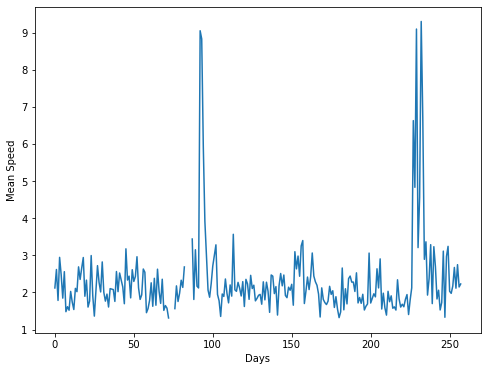

In [45]:
plt.figure(figsize=(8,6))
plt.plot(daily_mean_speed)
plt.xlabel("Days")
plt.ylabel("Mean Speed")
plt.savefig("daily_mean_speed.pdf")

In [60]:
# calculating daily mean speed of Sanne

data_sanne = birds_data[birds_data.bird_name=="Sanne"]
times_sanne = data_sanne.timestamp

elapsed_time_sanne = [time - times_sanne[40916] for time in times_sanne]
elapsed_days_sanne = np.array(elapsed_time_sanne)/datetime.timedelta(days=1)

next_day_sanne = 1
inds_sanne = []
daily_mean_speed_sanne = []
#enumerate() returns a tuple which has value and index
for (ind,s) in enumerate(elapsed_days_sanne):
    if s < next_day_sanne:
        inds_sanne.append(ind+40916)
    else:
        daily_mean_speed_sanne.append(np.mean(data_sanne.speed_2d[inds_sanne]))
        next_day_sanne +=1
        inds_sanne = []

In [55]:
data_sanne.speed_2d

40916    0.372156
40917    1.318484
40918    0.076158
40919    0.014142
40920    0.094340
           ...   
61915    0.208087
61916    1.522662
61917    3.120545
61918    0.592115
61919    0.485489
Name: speed_2d, Length: 21004, dtype: float64

In [61]:
daily_mean_speed_sanne

[3.3925056226231405,
 2.3532927387167315,
 2.124464923547976,
 3.1001788137590527,
 2.5424906826724194,
 1.5314369023031846,
 1.4216347041520654,
 1.8333385765955024,
 1.8747757101065052,
 2.2669841170169227,
 2.2627478365584524,
 1.8912412288582727,
 2.7012794848411863,
 3.60040225881341,
 5.704992484542234,
 4.287550585704819,
 8.005161171704843,
 3.9970882646015333,
 2.042113032215834,
 2.2726050311308703,
 2.5443624647234513,
 4.529482243414017,
 3.1951579324845354,
 5.2081293180382655,
 3.4435951501611735,
 2.164210391212312,
 3.4320015775718447,
 2.252867013680579,
 2.7065071308078594,
 3.514547515954242,
 3.065882094507122,
 2.8990588328920905,
 2.7442165223491513,
 2.173436696488998,
 3.3895288616193495,
 2.481381701241825,
 2.5920815602330523,
 2.389808117162854,
 2.62192052796429,
 2.3537202539374595,
 3.4256323769975716,
 4.227769390193748,
 1.9916647477177278,
 3.6473275066986206,
 2.501340115409531,
 4.2646788166882645,
 2.4295831670695236,
 2.785755794452571,
 2.393467577

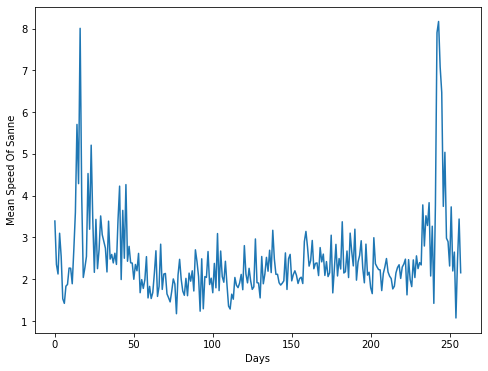

In [65]:
#bird_names = pd.unique(birds_data.bird_name)
plt.figure(figsize=(8,6))
plt.plot(daily_mean_speed_sanne)
plt.xlabel("Days")
plt.ylabel("Mean Speed Of Sanne")
plt.savefig("daily_mean_speed_sanne.pdf")

In [66]:
bird_names = pd.unique(birds_data.bird_name)
bird_names

array(['Eric', 'Nico', 'Sanne'], dtype=object)

In [73]:
# calculating daily mean speed of Nico
data_nico = birds_data[birds_data.bird_name=="Nico"]
times_nico = data_nico.timestamp

elapsed_time_nico = [time - times_nico[19795] for time in times_sanne]
elapsed_days_nico = np.array(elapsed_time_sanne)/datetime.timedelta(days=1)

next_day_nico = 1
inds_nico = []
daily_mean_speed_nico = []
#enumerate() returns a tuple which has value and index
for (ind,s) in enumerate(elapsed_days_nico):
    if s < next_day_nico:
        inds_nico.append(ind+19795)
    else:
        daily_mean_speed_nico.append(np.mean(data_nico.speed_2d[inds_nico]))
        next_day_nico +=1
        inds_nico = []

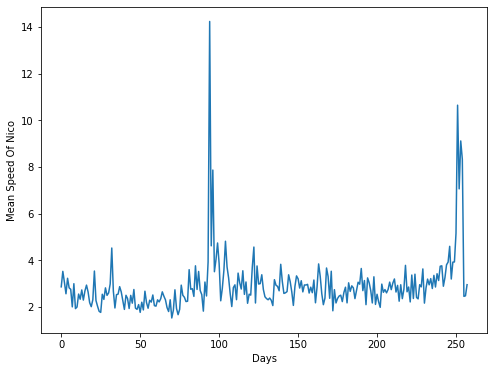

In [75]:
plt.figure(figsize=(8,6))
plt.plot(daily_mean_speed_nico)
plt.xlabel("Days")
plt.ylabel("Mean Speed Of Nico")
plt.savefig("daily_mean_speed_nico.pdf")